In [1]:
Hypothesis: 

SyntaxError: invalid syntax (<ipython-input-1-5bd988313932>, line 1)

In [2]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot


%matplotlib inline
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [4]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi


%matplotlib inline

# what are we achieving from here? defining the function of 95%? giving the formula
# whats matplotlib inline?

<IPython.core.display.Javascript object>

In [5]:
stocks = pd.read_csv(r"C:\Users\GaukharJavarova\Downloads\aggdata.csv")
stocks.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339098,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.292488,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734078,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377,-0.665162,0.372362,26.266234,6.440652,0.033847


<IPython.core.display.Javascript object>

In [6]:
# hyperlink_format = <a href="{C:\Users\GaukharJavarova\Downloads\indicators}">{indicators}</a>
# how to put a hyperlink here

<IPython.core.display.Javascript object>

In [7]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   40277 non-null  object 
 1   revenue                  39949 non-null  float64
 2   pb                       38433 non-null  float64
 3   debt                     39416 non-null  float64
 4   assets                   39416 non-null  float64
 5   netmargin                38980 non-null  float64
 6   ncfo                     39683 non-null  float64
 7   shareswa                 40072 non-null  float64
 8   sps                      39800 non-null  float64
 9   opinc                    39949 non-null  float64
 10  assetsc                  30302 non-null  float64
 11  liabilitiesc             30265 non-null  float64
 12  price                    38513 non-null  float64
 13  calendardate             40277 non-null  object 
 14  datekey               

<IPython.core.display.Javascript object>

In [8]:
stocks.shape

(40277, 31)

<IPython.core.display.Javascript object>

In [9]:
stocks["cashneq"].describe()  # here, numbers are given in Millions? go over numbers

count    3.941600e+04
mean     5.317810e+09
std      1.080713e+11
min      0.000000e+00
25%      7.426350e+07
50%      2.117000e+08
75%      6.499245e+08
max      5.314380e+12
Name: cashneq, dtype: float64

<IPython.core.display.Javascript object>

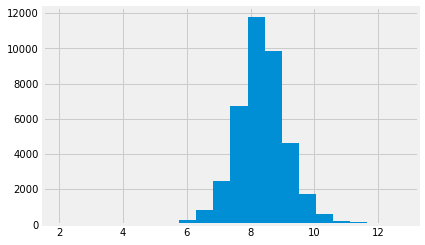

<IPython.core.display.Javascript object>

In [10]:
a = stocks["cashneq"].dropna()
b = a.apply(np.log10)
b[np.isfinite(b)].hist(bins=20)
plt.show()

# add description on x, y; why does it have NA values? what could it be?
# didn't get this well.
# log, what does it give?
# b[np.isfinite(b)]

In [11]:
stocks["enough_cash"] = np.where(
    stocks["cashneq"] > 1000000000, 1, 0
)  # if more than 1 B yes = 1, if no - 0. instead put "yes", 'no'
#  i'm asking more than 1B but why is 0 here, #can delete np.where and 1, 0, will give True or False.
# 1 could be for stocks having enough cash, but why 0??

<IPython.core.display.Javascript object>

In [12]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"] #finding every record thats on that date. end of the first quarter. 


<IPython.core.display.Javascript object>

In [13]:
df2018[["ticker", "calendardate", "enough_cash", "cashneq"]].head()

,ticker,calendardate,enough_cash,cashneq
8,ZYME,2018-03-31,0,3.098100e+07
23,ZUO,2018-03-31,0,2.027340e+08
37,ZTS,2018-03-31,1,1.654000e+09
58,ZS,2018-03-31,0,2.874430e+08
72,ZNGA,2018-03-31,0,3.715880e+08


<IPython.core.display.Javascript object>

In [14]:
df2018.shape

(1985, 32)

<IPython.core.display.Javascript object>

In [15]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"]

df2019 = stocks[stocks["calendardate"] == "2019-03-31"]
df2019 = df2019.rename(
    columns={"price": "price2019", "calendardate": "calendardate2019"}
)
# from dataframe 2018 took everything, since it's a main one, left all columns in it.
# from 2019 chose only:price, calendardate
# renamed them into +2019. the column calendardate made equal to the dates i need.

<IPython.core.display.Javascript object>

In [16]:
# df2019.info()

<IPython.core.display.Javascript object>

In [17]:
df2018 = pd.merge(
    df2018,
    df2019[["ticker", "price2019", "calendardate2019"]],
    how="inner",
    on="ticker",
)
df2018.info()
# merging here df2019 and df2018 two dataframes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1985 non-null   object 
 1   revenue                  1982 non-null   float64
 2   pb                       1858 non-null   float64
 3   debt                     1897 non-null   float64
 4   assets                   1897 non-null   float64
 5   netmargin                1922 non-null   float64
 6   ncfo                     1973 non-null   float64
 7   shareswa                 1977 non-null   float64
 8   sps                      1974 non-null   float64
 9   opinc                    1982 non-null   float64
 10  assetsc                  1455 non-null   float64
 11  liabilitiesc             1454 non-null   float64
 12  price                    1865 non-null   float64
 13  calendardate             1985 non-null   object 
 14  datekey                 

<IPython.core.display.Javascript object>

In [25]:
df2018 = df2018.dropna()


<IPython.core.display.Javascript object>

In [28]:
df2018 = df2018[df2018["return"] <= 2]


<IPython.core.display.Javascript object>

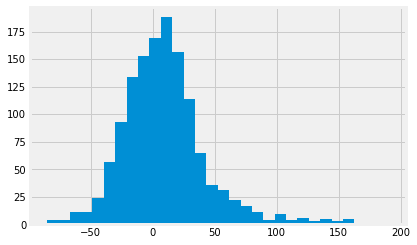

DescribeResult(nobs=1340, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.09442153640200235, variance=0.11888521649064611, skewness=1.144651524691345, kurtosis=3.1507116856549793)


<IPython.core.display.Javascript object>

In [29]:
df2018["return"] = (df2018["price2019"] - df2018["price"]) / df2018[
    "price"
]  # looking at the percent difference
(100 * df2018["return"]).hist(bins=30)
plt.show()
print(stats.describe(df2018["return"]))

In [23]:
df2018

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019,calendardate2019,return
0,ZYME,4.000000e+04,3.238,0.000000e+00,1.135380e+08,-530.100,-1.757100e+07,25459150.0,0.002,-20111000.0,...,-502.775000,-0.690102,0.001571,-52.260870,3.959637,0.000000,0,16.18,2019-03-31,0.346090
1,ZUO,5.244800e+07,11.461,1.612400e+07,3.068060e+08,-0.339,-7.826000e+06,44886000.0,1.168,-16823000.0,...,-0.320756,-0.076345,0.511647,-25.442536,1.997340,0.052554,0,22.10,2019-03-31,0.147456
2,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,485900000.0,2.811,464000000.0,...,0.339678,0.801643,2.815022,29.384236,2.597000,0.570081,1,100.67,2019-03-31,0.205484
3,ZS,4.916300e+07,14.421,0.000000e+00,4.055380e+08,-0.203,8.117000e+06,73818000.0,0.666,-9024000.0,...,-0.183553,0.069180,0.419009,-145.097087,2.226074,0.000000,0,68.31,2019-03-31,1.285380
4,ZNGA,2.082320e+08,1.940,0.000000e+00,1.919011e+09,0.027,-3.947000e+06,869627000.0,0.239,4257000.0,...,0.020444,-0.004530,0.238964,36.969697,3.170025,0.000000,0,5.33,2019-03-31,0.456284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,AAON,9.908200e+07,8.534,0.000000e+00,3.069450e+08,0.043,1.074400e+07,52433902.0,1.890,5178000.0,...,0.052260,0.204908,1.889680,141.304348,1.352039,0.000000,0,46.18,2019-03-31,0.184103
1981,AAN,9.548090e+08,1.859,3.585190e+08,2.719009e+09,0.055,1.965760e+08,70105000.0,13.620,70064000.0,...,0.073380,2.805121,13.625032,16.322242,NaN,0.131856,0,52.60,2019-03-31,0.128755
1982,AAL,1.040100e+10,-24.150,2.473900e+10,5.328000e+10,0.015,1.800000e+09,473138683.0,21.983,396000000.0,...,0.038073,3.804381,21.982984,-37.354421,0.434737,0.464321,0,31.76,2019-03-31,-0.388761
1983,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,186175616.0,16.597,517000000.0,...,0.167314,0.295420,16.597233,10.502219,0.738239,0.085400,1,28.16,2019-03-31,-0.373665


<IPython.core.display.Javascript object>

In [ ]:
(100 * df2018["return"]).plot.box()
# do the drop() of more than
# drop the high percent change observations

# and re-look at the distribution

# (skew/kurtosis)

In [ ]:
plt.plot(df2018["cashneq"], df2018["return"], "o")
plt.show()
print(stats.describe(df2018["cashneq"]))


In [ ]:
df2018[df2018["return"] > 4]

In [ ]:
df2018[df2018["enough_cash"] == 1] #for dropping the high % of those above

In [ ]:
cash_rich = df2018[df2018["enough_cash"] == 1]
plt.plot(cash_rich["cashneq"], cash_rich["return"], "o")
plt.show()
print(stats.describe(df2018["enough_cash"]))

In [ ]:
# df2018 = df2018.dropna()
# print(df2018)

In [ ]:
cash_weak = df2018[df2018["enough_cash"] == 0]
plt.plot(cash_weak["cashneq"], cash_weak["return"], "o")
plt.show()
print(stats.describe(cash_weak["return"]))

In [ ]:

#paired_pain = pain[["audio_book", "control"]]
#paired_pain["diff"] = pain["audio_book"] - pain["control"]

In [ ]:
paired_pain["diff"].hist()
plt.show()

In [ ]:
# plt.hist(cash_rich["cashneq"], alpha=0.5)
# plt.hist(cash_weak["cashneq"], alpha=0.5)
# plt.show()

In [ ]:
stats.ttest_ind(cash_rich["return"].dropna(), cash_weak["return"].dropna())

ttest shows the significant difference between values, therefore rejecting the null hypotheses. 
    We see that companies, which have cash and equivalents on hands tend to perform better than those which don't have. We can see the differences in returns in both groups, while companies with no cash loose money when cash_rich companies ACTUALLY DIDN'T GET THE INTERPRETATION OF THIS CHART. 
    what's the confidence interval here??

Non-normal: Mann-Whitney U (independent)

In [ ]:
stats.wilcoxon((cash_rich["return"] - cash_weak["return"]))

In [ ]:
#pvalue less than 0.5 so it's still not normal, what am i gonna do?? conduct a new hypothesis. 